# Exploratory Data Analysis

### loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import math
import geopandas as gpd
from shapely.geometry import Point, Polygon
import sys
sns.set()
'geopandas' in sys.modules

True

In [2]:
df_merged = pd.read_csv('df_comp_pluto_merged.csv')
df_merged

,Unnamed: 0,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,Street Name,City,Status,Borough_x,...,HEAT/HOT WATER_count,UNSANITARY CONDITION_count,PAINT/PLASTER_count,PLUMBING_count,DOOR/WINDOW_count,WATER LEAK_count,ELECTRIC_count,GENERAL_count,FLOORING/STAIRS_count,APPLIANCE_count
0,0,45284700.0,2019-12-31 15:02:46,ELECTRIC,10031.0,605 WEST 142 STREET,WEST 142 STREET,NEW YORK,Closed,MANHATTAN,...,1679,495,459,361,307,254,180,188,223,94
1,1,30380422.0,2015-04-11 10:38:22,FLOORING/STAIRS,10031.0,605 WEST 142 STREET,WEST 142 STREET,NEW YORK,Closed,MANHATTAN,...,1679,495,459,361,307,254,180,188,223,94
2,2,34825450.0,2016-11-20 00:28:29,HEAT/HOT WATER,10031.0,605 WEST 142 STREET,WEST 142 STREET,NEW YORK,Closed,MANHATTAN,...,1679,495,459,361,307,254,180,188,223,94
3,3,45284480.0,2019-12-31 18:39:21,PAINT/PLASTER,11423.0,91-21 195 STREET,195 STREET,Hollis,Closed,QUEENS,...,96,43,25,28,17,18,26,9,10,8
4,4,45260417.0,2019-12-28 00:17:45,HEAT/HOT WATER,11423.0,91-21 195 STREET,195 STREET,Hollis,Closed,QUEENS,...,96,43,25,28,17,18,26,9,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180377,186456,44031465.0,2019-10-11 07:23:58,HEAT/HOT WATER,11233.0,24 ROOSEVELT PLACE,ROOSEVELT PLACE,BROOKLYN,Closed,BROOKLYN,...,741,421,279,276,196,192,169,133,116,76
180378,186457,44032433.0,2019-10-11 11:35:39,HEAT/HOT WATER,11203.0,458 EAST 48 STREET,EAST 48 STREET,BROOKLYN,Closed,BROOKLYN,...,825,392,274,219,169,157,113,89,116,61
180379,186458,44032458.0,2019-10-11 17:33:43,HEAT/HOT WATER,10025.0,825 COLUMBUS AVENUE,COLUMBUS AVENUE,NEW YORK,Open,MANHATTAN,...,856,243,208,166,103,105,105,120,97,44
180380,186459,44040819.0,2019-10-12 07:56:19,HEAT/HOT WATER,10453.0,1904 LORING PLACE SOUTH,LORING PLACE SOUTH,BRONX,Closed,BRONX,...,1815,671,595,429,386,318,191,205,258,119


In [3]:
df_merged.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Complaint Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'City', 'Status',
       'Borough_x', 'Latitude', 'Longitude', 'hour', 'month', 'year',
       'Borough_y', 'ZipCode', 'Address', 'LandUse', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors',
       'UnitsTotal', 'BldgFront', 'BldgDepth', 'LotType', 'BsmtCode',
       'AssessTot', 'YearBuilt', 'YearAlter1', 'AlterAge',
       'HEAT/HOT WATER_count', 'UNSANITARY CONDITION_count',
       'PAINT/PLASTER_count', 'PLUMBING_count', 'DOOR/WINDOW_count',
       'WATER LEAK_count', 'ELECTRIC_count', 'GENERAL_count',
       'FLOORING/STAIRS_count', 'APPLIANCE_count'],
      dtype='object')

make a function for an easier dataframe check

In [4]:
def check_values(df):
    col_desc = []
    data = {
        'features': [col for col in df.columns],
        'data_type': [df[col].dtype for col in df.columns],
        'nan_total': [df[col].isna().sum() for col in df.columns],
        'nan_pct': [round(df[col].isna().sum()/len(df)*100,2) for col in df.columns],
        'unique': [df[col].nunique() for col in df.columns],
        'values_ex': [df[col].drop_duplicates().sample(df[col].nunique()).values if df[col].nunique() <= 5 else df[col].drop_duplicates().sample(2).values for col in df.columns]
    }
    return pd.DataFrame(data)

In [5]:
check_values(df_merged)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unnamed: 0,int64,0,0.0,180382,"[51899, 95499]"
1,Unique Key,float64,0,0.0,180233,"[39009180.0, 40204878.0]"
2,Created Date,object,0,0.0,166678,"[2018-10-15 14:17:39, 2017-03-12 17:45:15]"
3,Complaint Type,object,0,0.0,15,"[APPLIANCE, PAINT/PLASTER]"
4,Incident Zip,float64,0,0.0,180,"[11693.0, 11220.0]"
5,Incident Address,object,0,0.0,40793,"[104 ALBANY AVENUE, 1208 NOSTRAND AVENUE]"
6,Street Name,object,0,0.0,3882,"[BISMARK AVENUE, NORTON AVENUE]"
7,City,object,0,0.0,46,"[BRONX, South Richmond Hill]"
8,Status,object,0,0.0,3,"[In Progress, Open, Closed]"
9,Borough_x,object,0,0.0,6,"[MANHATTAN, BROOKLYN]"


In [6]:
df_merged['year'] = df_merged.year.astype('int')
df_merged.year.dtype

dtype('int32')

## Top 10 Complaints of All Time (2014-2019)

check Top 10 Complaints from 2014-2019. HEAT/HOT WATER by far has the highest number

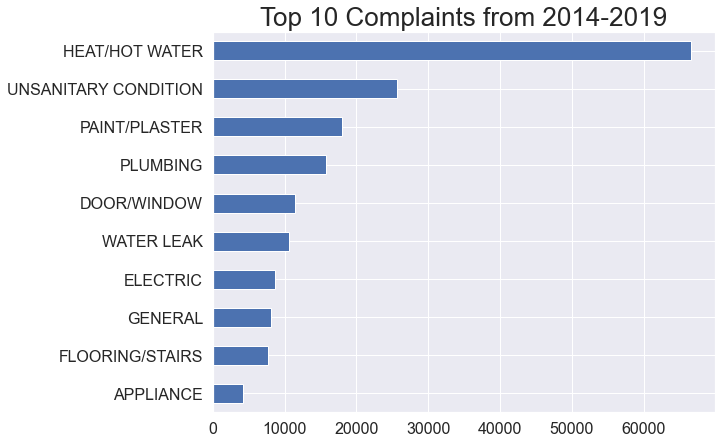

In [18]:
plt.figure(figsize=(9,7))
df_merged.groupby('Complaint Type')['Complaint Type'].count().sort_values().tail(10).plot.barh()
plt.title('Top 10 Complaints from 2014-2019', size=26)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel('')
plt.savefig('top10.png', bbox_inches = 'tight')
plt.show()

In [30]:
df_merged.rename(columns={'Borough_x':'Borough'}, inplace=True)

there's still one row containing 'Unspecified' value on Borough column so we better remove it

In [31]:
df_merged.Borough.value_counts()

BROOKLYN         59745
BRONX            58493
MANHATTAN        38076
QUEENS           21215
STATEN ISLAND     2852
Unspecified          1
Name: Borough, dtype: int64

In [32]:
df_merged.drop(index=df_merged[df_merged.Borough == 'Unspecified'].index, inplace=True)

make new column `Heat` to indicate whether a complaint is a HEAT/HOT WATER complaint

In [33]:
df_merged['Heat'] = df_merged['Complaint Type'] == 'HEAT/HOT WATER'
df_merged.Heat.head()

0    False
1    False
2     True
3    False
4     True
Name: Heat, dtype: bool

In [34]:
df_merged['Heat'] = df_merged['Heat'].replace({False:'No', True:'Yes'})
df_merged.Heat.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Heat, dtype: object

there's very little data in year 2014, which we are not sure whether it is randomly distributed, so we will remove it. in general, the number of complaints were similar in 2016, 2017, and 2018, then decreased in 2019.

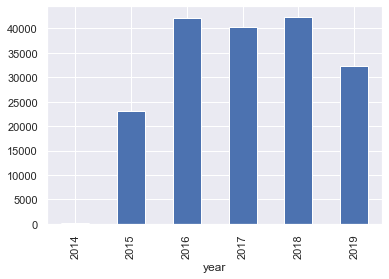

In [35]:
df_merged.groupby('year')['year'].count().plot.bar()
plt.show()

In [36]:
df_merged.drop(index=df_merged[df_merged.year == 2014].index, inplace=True)

## Yearly Top 10 Complaints (2015-2019)

make a function to plot complaint details (the type and the origin) for each year. in all the year, HEAT/HOT WATER complaint has the highest number

In [42]:
def plot_year(df, col):
    fig, ax = plt.subplots(3,2, figsize=(18,12))
    i = 1
    for year in np.arange(df_merged.year.min(), df_merged.year.max()+1, 1):
        plt.subplot(3,2,i)
        g = df[df.year==year].groupby(col)[col].count().sort_values(ascending=False).head(10).plot.barh()
        g.set_title(year, size=18)
        i += 1
    ax[-1, -1].axis('off')
    plt.tight_layout()

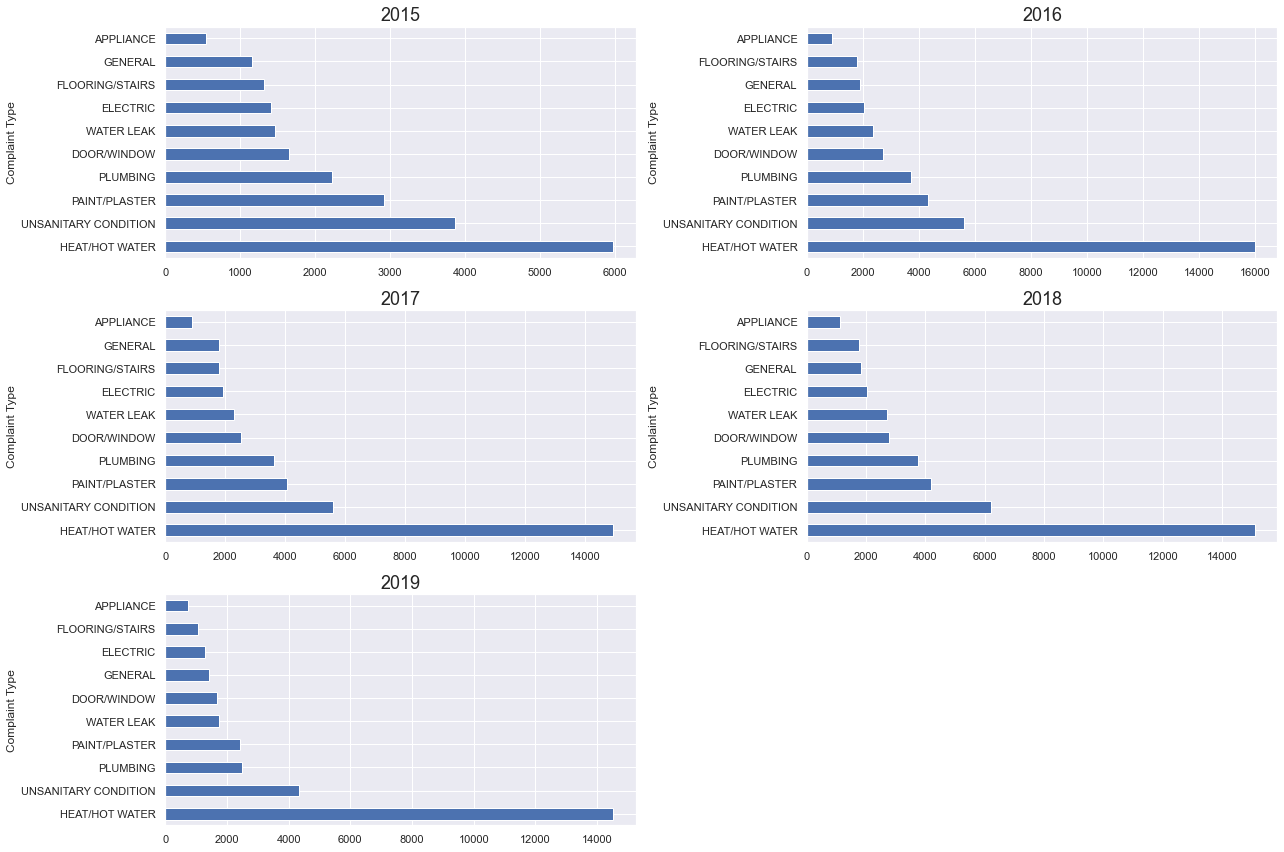

Wall time: 15.9 s


In [43]:
%%time
plot_year(df_merged, 'Complaint Type')
plt.show()

## Yearly Number of Complaints for Each Borough (2015-2019)

borough with the most complaints is Brooklyn, which is expected since it has the highest population with a little less than 5 million people. Bronx has similar number of complaints as Brooklyn although its population is around half that of Brooklyn.

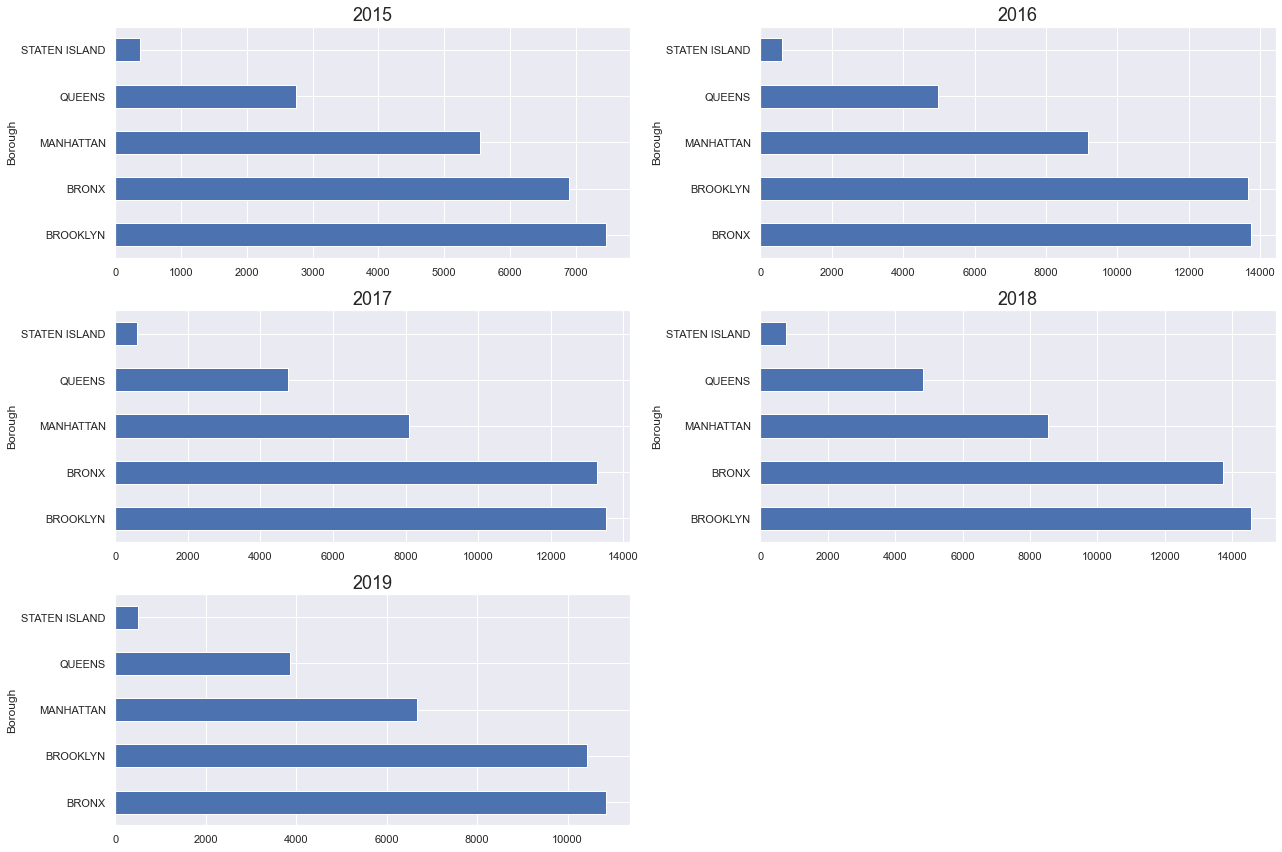

Wall time: 6.89 s


In [45]:
%%time
plot_year(df_merged, 'Borough')
plt.show()

<Figure size 864x648 with 0 Axes>

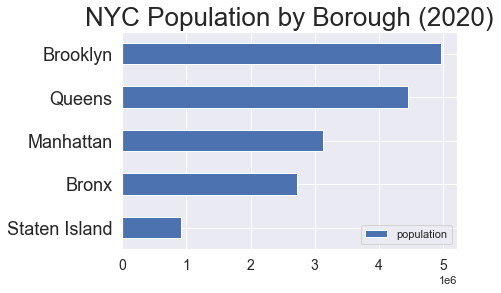

In [28]:
plt.figure(figsize=(12,9))
pd.read_csv('https://data.cityofnewyork.us/resource/h2bk-zmw6.csv').sort_values('population').set_index('borough').plot.barh()
plt.title('NYC Population by Borough (2020)', size=26)
plt.xticks(size=14)
plt.yticks(size=18)
# plt.xlabel('million', size=16)
plt.xlabel('')
plt.ylabel('')
plt.savefig('nycpop.png', bbox_inches = 'tight')
plt.show()

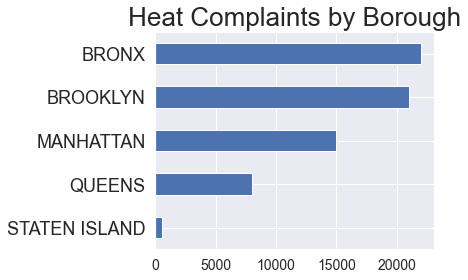

In [41]:
plt.figure(figsize=(5,4))
df_merged[df_merged.Heat=='Yes'].groupby('Borough')['Borough'].count().sort_values().plot.barh()
plt.title('Heat Complaints by Borough', size=26)
plt.xticks(size=14)
plt.yticks(size=18)
# plt.xlabel('million', size=16)
plt.xlabel('')
plt.ylabel('')
plt.savefig('heatborough.png', bbox_inches = 'tight')
plt.show()

## Trends for Each Complaints (2016-2019)

In [46]:
def plot_yearly(df, col):
    labels = [2016, 2017, 2018, 2019]
    unique_vals = df[col].value_counts().head(10).index
    rows = math.ceil(len(unique_vals)/3)
    fig, ax = plt.subplots(rows,3, figsize=(12,2*rows))
    for i, val in enumerate(unique_vals):
        plt.subplot(rows,3,i+1)
        plt.plot(df[(df[col] == val) & (df.year.isin(labels))].groupby('year')['year'].count())
        plt.xticks(labels)
        plt.title(val)
    for i in np.arange(rows*3 - len(unique_vals)):
        ax[-1, -(i+1)].axis('off')
    plt.tight_layout()

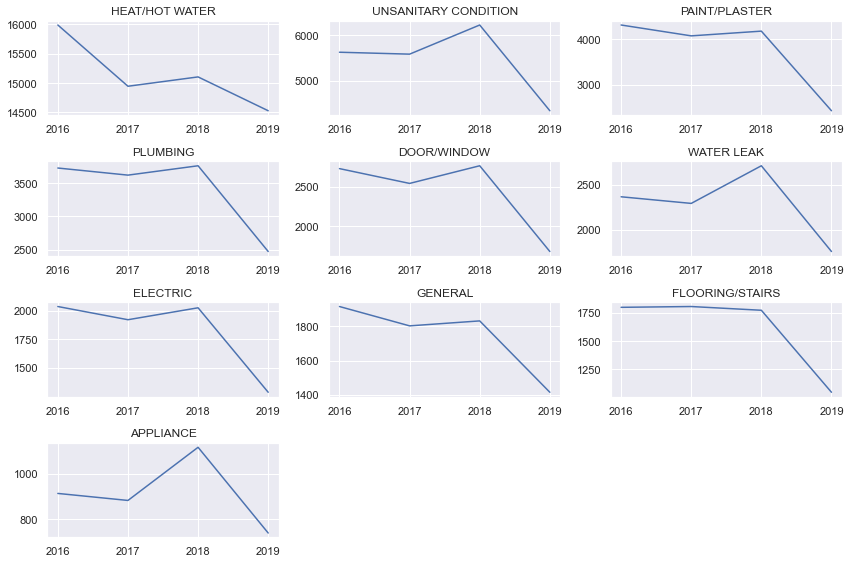

In [47]:
plot_yearly(df_merged, 'Complaint Type')
plt.show()

## Total Complaints Trend in Each Borough (2016-2019)

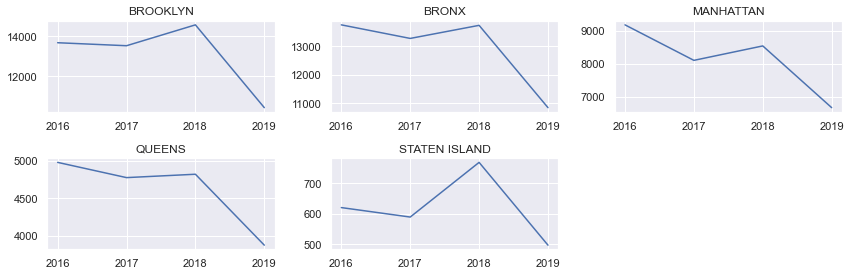

In [48]:
plot_yearly(df_merged, 'Borough')
plt.show()

## Trend of Each Complaint Type Throughout an Interval (Year, Week, Day)

In [49]:
%%time
df_merged['Created Date'] = pd.to_datetime(df_merged['Created Date'])
df_merged['Created Date'].dtype

Wall time: 638 ms


dtype('<M8[ns]')

In [50]:
df_merged['dayofweek'] = df_merged['Created Date'].dt.dayofweek
df_merged['dayofweek'].dtype

dtype('int64')

In [51]:
calendar.day_abbr

In [52]:
def plot_time_interval(df, col, interval):
    ## interval should be either 'month', 'hour', or 'dayofweek'
    unique_vals = df[col].value_counts().head(10).index
    rows = math.ceil(len(unique_vals)/3)

    fig, ax = plt.subplots(rows,3, figsize=(12,3*rows))
    if interval == 'month':
        title = 'Year'
    elif interval == 'hour':
        title = 'Day'
    else: title = 'Week'
    fig.suptitle(col+' Throughout the '+title)

    for i, val in enumerate(unique_vals):
        plt.subplot(rows,3,i+1)
        df[df[col] == val].groupby(interval)[interval].count().plot.bar()
        if interval == 'month':
            bulan = {month: index for index, month in enumerate(calendar.month_abbr) if month} 
            plt.xticks(ticks=list(bulan.values()), labels=list(bulan.keys()), rotation=45, horizontalalignment='right')
        elif interval == 'hour':
            plt.xticks(ticks=np.arange(0,24,4), labels=['12 AM', '4 AM', '8 AM', '12 PM', '4 PM', '8 PM'], rotation=-15, horizontalalignment='left')
        else:
            hari = {day: index for index, day in enumerate(calendar.day_abbr) if day} 
            plt.xticks(ticks=list(hari.values()), labels=list(hari.keys()), rotation=45, horizontalalignment='right')
        plt.title(val)

    for i in np.arange(rows*3 - len(unique_vals)):
        ax[-1, -(i+1)].axis('off')
    plt.tight_layout()

### Trend of Each Complaint Type Throughout the Year

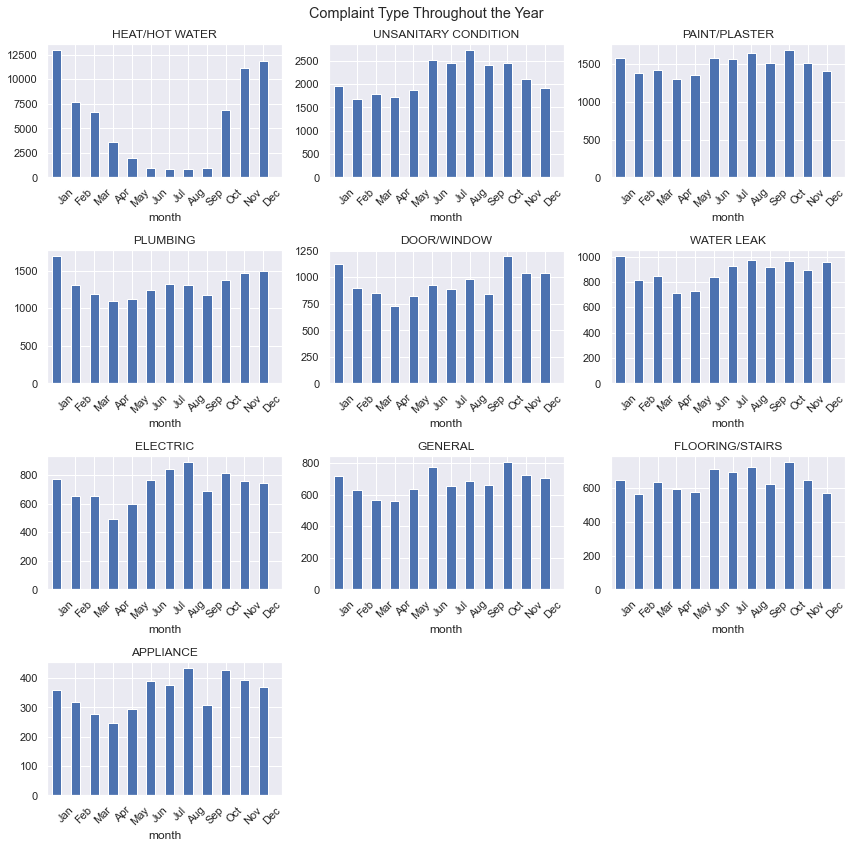

Wall time: 18.4 s


In [53]:
%%time
plot_time_interval(df_merged, 'Complaint Type', 'month')
plt.show()

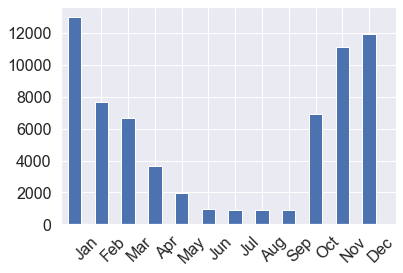

In [60]:
# plt.figure(figsize=(8,6))
df_merged[df_merged['Complaint Type'] == 'HEAT/HOT WATER'].groupby('month')['month'].count().plot.bar()
bulan = {month: index for index, month in enumerate(calendar.month_abbr) if month} 
plt.xticks(ticks=list(bulan.values()), labels=list(bulan.keys()), rotation=45, horizontalalignment='right')
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('')
plt.savefig('heatmonth.png', bbox_inches = 'tight')
plt.show()

### HEAT/HOT WATER Trends

as expected, HEAT/HOT WATER complaints started happening in fall and peaked in January when the temperature hit the lowest. (dataset from [NOAA](https://www.ncdc.noaa.gov/cdo-web/search))

In [61]:
nyc_temp = pd.read_csv(r"C:\Users\azuka\Downloads\2453186.csv", parse_dates=['DATE'])
nyc_temp.head()

,STATION,DATE,TAVG,TMAX,TMIN,TOBS
0,USC00280907,2019-01-01,NaN,11.7,-2.8,11.1
1,USC00280907,2019-01-02,NaN,12.8,0.0,0.6
2,USC00280907,2019-01-03,NaN,3.3,0.0,3.3
3,USC00280907,2019-01-04,NaN,5.6,-3.3,-2.8
4,USC00280907,2019-01-05,NaN,6.1,-3.3,4.4


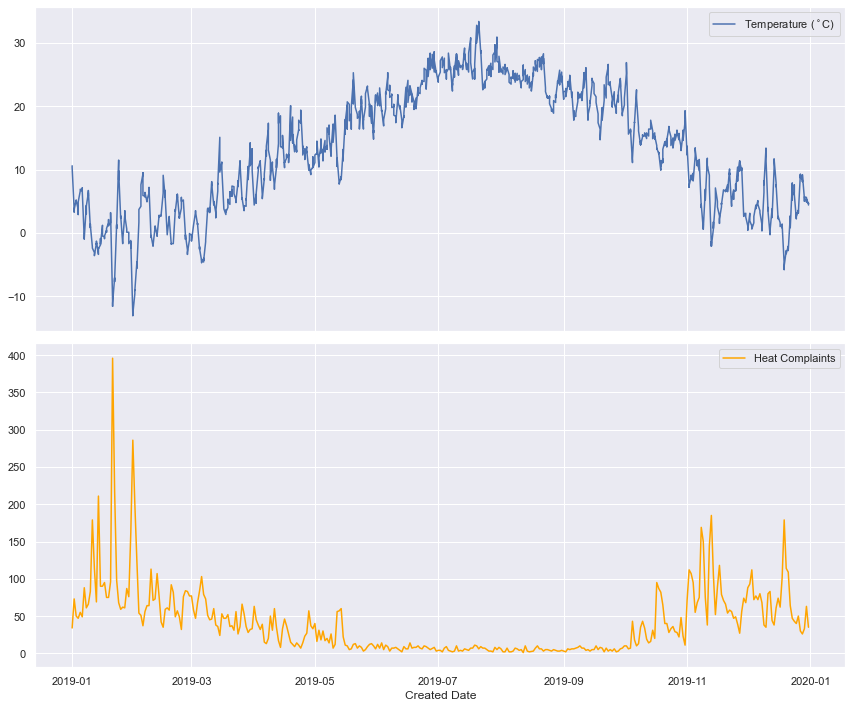

In [62]:
fig=plt.figure(figsize=(12,10))
ax1 = plt.subplot(211)
nyc_temp.set_index('DATE').dropna(subset=['TAVG'])['TAVG'].plot.line(label='Temperature ($^\circ$C)', ax=ax1)
ax1.legend()
ax2 = plt.subplot(212, sharex = ax1)
df_merged[(df_merged.Heat == 'Yes')&(df_merged.year==2019)].groupby(df_merged['Created Date'].dt.date)['Heat'].count().plot.line(label='Heat Complaints', ax=ax2, color='orange')
ax2.legend()
plt.tight_layout()
plt.show()

### Trend of Each Complaint Type Throughout the Day

for each complaint type except HEAT/HOT WATER, the trend throughout the day was similar in which it increased at 9 AM and reached its peak at noon and then decreased and reached the lowest at late at night (2-3 AM) and stayed low until the morning (6 AM).

for HEAT/HOT WATER, the number of complaints dropped after the noon but stayed high during the night. it only dropped after midnight and reached its lowest at around 2-3 AM.

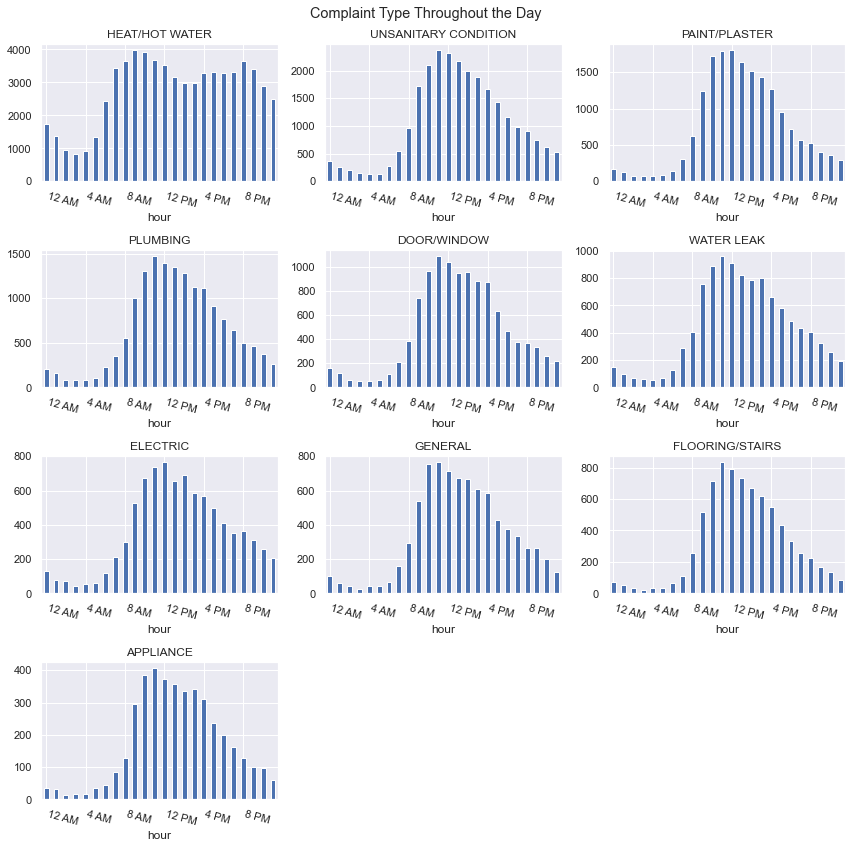

Wall time: 15.6 s


In [63]:
%%time
plot_time_interval(df_merged, 'Complaint Type', 'hour')
plt.show()

### Trend of Each Complaint Type Throughout the Week

for each complaint type except HEAT/HOT WATER, the trend throughout the day week similar in which it stayed constant during the weekdays and decreased during the weekends. for HEAT/HOT WATER, the number of complaints stayed constant throughout the week and was slightly higher on Monday compared with the other day.

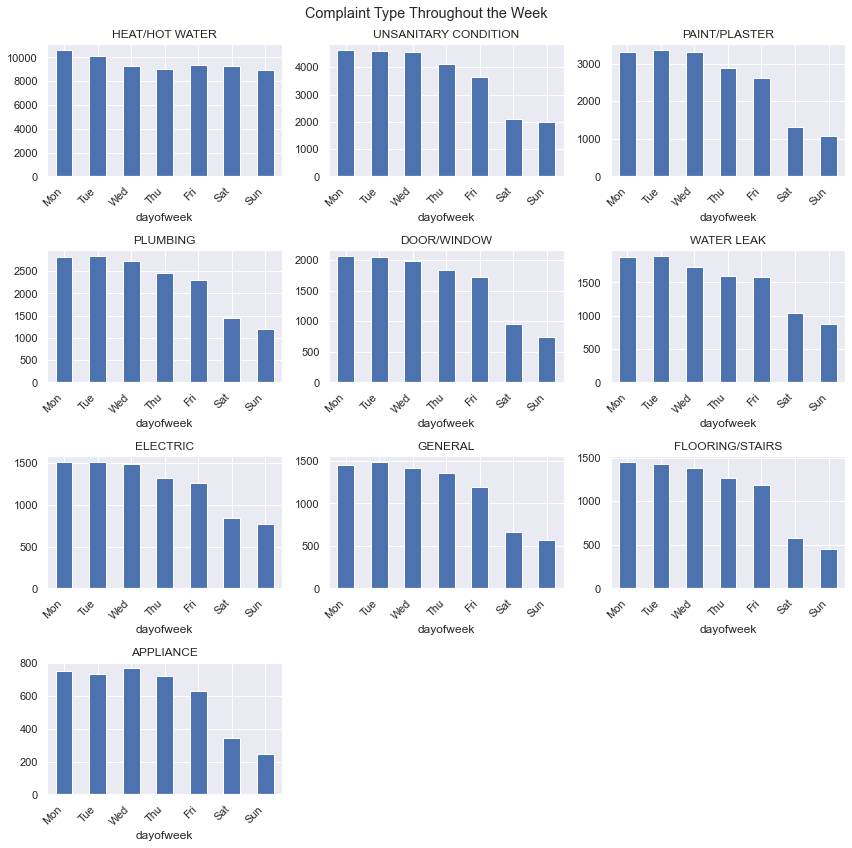

Wall time: 26.5 s


In [71]:
%%time
plot_time_interval(df_merged, 'Complaint Type', 'dayofweek')
plt.show()

In [72]:
df_merged[df_merged['Complaint Type']=='HEAT/HOT WATER'].groupby('Incident Zip')['Incident Zip'].count().sort_values(ascending=False)

Incident Zip
11226.0    2480
10458.0    2081
10467.0    2017
10468.0    1856
10453.0    1813
           ... 
11040.0       1
10004.0       1
10069.0       1
10169.0       1
10044.0       1
Name: Incident Zip, Length: 178, dtype: int64

## Distribution of Each Building Characteristic for HEAT/HOT WATER and non-HEAT/HOT WATER Complaints

In [73]:
df_merged.select_dtypes('number').columns

Index(['Unnamed: 0', 'Unique Key', 'Incident Zip', 'Latitude', 'Longitude',
       'hour', 'month', 'year', 'ZipCode', 'LandUse', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors',
       'UnitsTotal', 'BldgFront', 'BldgDepth', 'LotType', 'BsmtCode',
       'AssessTot', 'YearBuilt', 'YearAlter1', 'AlterAge',
       'HEAT/HOT WATER_count', 'UNSANITARY CONDITION_count',
       'PAINT/PLASTER_count', 'PLUMBING_count', 'DOOR/WINDOW_count',
       'WATER LEAK_count', 'ELECTRIC_count', 'GENERAL_count',
       'FLOORING/STAIRS_count', 'APPLIANCE_count', 'dayofweek'],
      dtype='object')

In [86]:
pluto_numcols = 'LotArea BldgArea NumFloors UnitsTotal AssessTot AlterAge'.split()
len(pluto_numcols)

6

In [75]:
df_merged.Heat.value_counts()

No     113623
Yes     66551
Name: Heat, dtype: int64

In [88]:
def plot_pluto_nums(df, cols):
    row = 2
    column = 3
    fig, ax = plt.subplots(row,column, figsize=(12,8))
    # fig.suptitle('lala')
    i = 0
    j = 0
    for col in cols:
        g=df.boxplot(col, 'Heat', ax=ax[i][j], showfliers=False)
        if j == column-1:
            j=0
        else: j+=1
        if j == 0:
            i+=1
        g.set_title(col,size=16)
        g.set_xlabel(None)

    for i in np.arange(row*column - len(cols)):
        ax[-1, -(i+1)].axis('off')

    plt.tight_layout()

it seems that there are no difference in building characteristics between HEAT/HOT WATER and non-HEAT/HOT WATER complaints

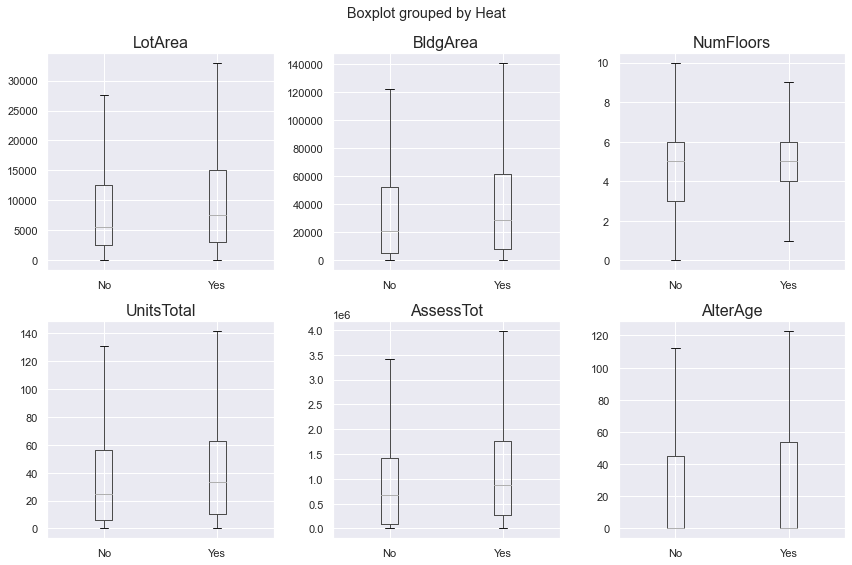

Wall time: 15.7 s


In [90]:
%%time
plot_pluto_nums(df_merged, pluto_numcols)
plt.savefig('boxplotpluto.png', bbox_inches = 'tight')
plt.show()

In [79]:
desc = df_merged[pluto_numcols].describe()
desc

,LotArea,BldgArea,NumBldgs,NumFloors,UnitsTotal,AssessTot,AlterAge
count,1.801740e+05,1.801740e+05,180174.000000,180174.000000,180174.000000,1.801740e+05,180174.000000
mean,1.257543e+04,4.449600e+04,1.142534,5.070009,45.800188,1.575407e+06,19.112075
std,3.816873e+04,1.291865e+05,0.851284,3.113693,80.266343,6.400642e+06,32.578189
min,1.000000e+00,5.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.692000e+03,6.006000e+03,1.000000,4.000000,8.000000,1.253585e+05,0.000000
50%,6.250000e+03,2.274600e+04,1.000000,5.000000,28.000000,7.524000e+05,0.000000
75%,1.350000e+04,5.553500e+04,1.000000,6.000000,59.000000,1.536750e+06,49.000000
max,7.492320e+06,1.343508e+07,73.000000,60.000000,3857.000000,9.206460e+08,2005.000000


In [37]:
pluto_numcols

['LotArea',
 'BldgArea',
 'NumBldgs',
 'NumFloors',
 'UnitsTotal',
 'AssessTot',
 'AlterAge']

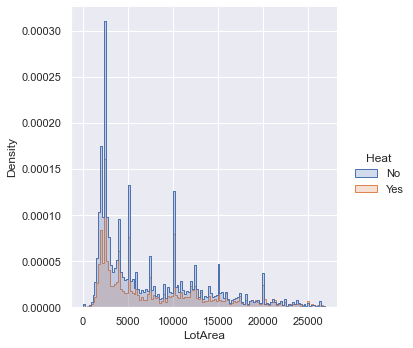

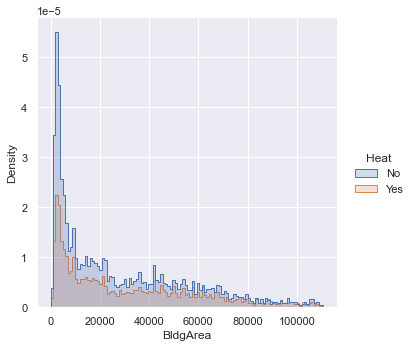

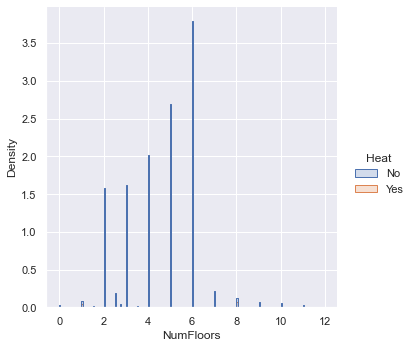

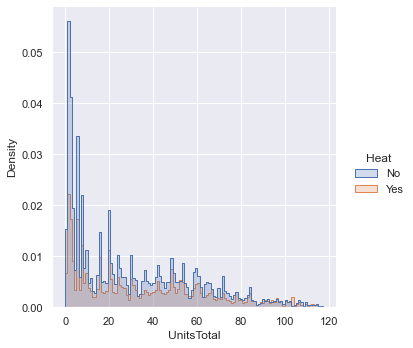

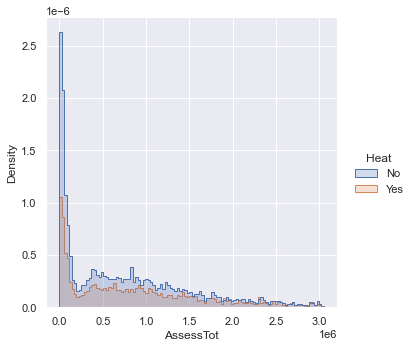

Wall time: 30.2 s


In [38]:
%%time

for col in ['LotArea', 'BldgArea', 'NumFloors', 'UnitsTotal', 'AssessTot']:
    sns.displot(data=df_merged, x=col, hue='Heat', bins=np.arange(0,2*desc.loc['75%',col],(desc.loc['75%',col]-desc.loc['25%',col])/50), stat='density', element='step')
plt.show()

In [39]:
check_values(df_merged)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,Unnamed: 0,int64,0,0.0,180755,"[18770, 32314]"
1,Unique Key,float64,0,0.0,180436,"[38528488.0, 41280451.0]"
2,Created Date,datetime64[ns],0,0.0,166868,"[2017-06-06T13:55:12.000000000, 2016-01-01T11:..."
3,Complaint Type,object,0,0.0,14,"[OUTSIDE BUILDING, GENERAL]"
4,Incident Zip,float64,0,0.0,180,"[11423.0, 11215.0]"
5,Incident Address,object,0,0.0,40859,"[68 STEUBEN STREET, 1812 AMSTERDAM AVENUE]"
6,Street Name,object,0,0.0,3887,"[WEST 87 STREET, KEW FOREST LANE]"
7,City,object,0,0.0,46,"[South Ozone Park, Little Neck]"
8,Status,object,0,0.0,3,"[Open, Closed, In Progress]"
9,Borough,object,0,0.0,5,"[BRONX, MANHATTAN, STATEN ISLAND, BROOKLYN, QU..."


In [40]:
# df_merged.drop(columns=['Unnamed: 0']).to_csv('df_merged.csv', index=False)
# print('Finish')

## Making Maps

geospatial data for NYC from [here](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm)

In [43]:
# import street map
street_map = gpd.read_file(f'nycmap\geo_export_539a5b1e-b996-4ffe-96b2-338d661b0805.shp')

In [44]:
df_merged.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Complaint Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'City', 'Status',
       'Borough', 'Latitude', 'Longitude', 'hour', 'month', 'year',
       'Borough_y', 'ZipCode', 'Address', 'LandUse', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors',
       'UnitsTotal', 'BldgFront', 'BldgDepth', 'LotType', 'BsmtCode',
       'AssessTot', 'YearBuilt', 'YearAlter1', 'AlterAge',
       'HEAT/HOT WATER_count', 'UNSANITARY CONDITION_count',
       'PAINT/PLASTER_count', 'PLUMBING_count', 'DOOR/WINDOW_count',
       'WATER LEAK_count', 'ELECTRIC_count', 'GENERAL_count',
       'FLOORING/STAIRS_count', 'APPLIANCE_count', 'Heat', 'dayofweek'],
      dtype='object')

In [50]:
map_cols = df_merged.iloc[:,-12:-2].columns.to_list()
map_cols

['HEAT/HOT WATER_count',
 'UNSANITARY CONDITION_count',
 'PAINT/PLASTER_count',
 'PLUMBING_count',
 'DOOR/WINDOW_count',
 'WATER LEAK_count',
 'ELECTRIC_count',
 'GENERAL_count',
 'FLOORING/STAIRS_count',
 'APPLIANCE_count']

In [51]:
map_cols.append('Latitude')
map_cols.append('Longitude')
map_cols

['HEAT/HOT WATER_count',
 'UNSANITARY CONDITION_count',
 'PAINT/PLASTER_count',
 'PLUMBING_count',
 'DOOR/WINDOW_count',
 'WATER LEAK_count',
 'ELECTRIC_count',
 'GENERAL_count',
 'FLOORING/STAIRS_count',
 'APPLIANCE_count',
 'Latitude',
 'Longitude']

In [52]:
# designate coordinate system
crs = {'init':'espc:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df_merged['Longitude'], df_merged['Latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df_merged[map_cols], crs = crs, geometry = geometry)
geo_df.head()

,HEAT/HOT WATER_count,UNSANITARY CONDITION_count,PAINT/PLASTER_count,PLUMBING_count,DOOR/WINDOW_count,WATER LEAK_count,ELECTRIC_count,GENERAL_count,FLOORING/STAIRS_count,APPLIANCE_count,Latitude,Longitude,geometry
0,1679,495,459,361,307,254,180,188,223,94,40.824694,-73.952255,POINT (-73.95226 40.82469)
1,1679,495,459,361,307,254,180,188,223,94,40.824694,-73.952255,POINT (-73.95226 40.82469)
2,1679,495,459,361,307,254,180,188,223,94,40.824694,-73.952255,POINT (-73.95226 40.82469)
3,96,43,25,28,17,18,26,9,10,8,40.712909,-73.765953,POINT (-73.76595 40.71291)
4,96,43,25,28,17,18,26,9,10,8,40.712909,-73.765953,POINT (-73.76595 40.71291)


In [54]:
print(f'Longitude: {df_merged.Longitude.min()} - {df_merged.Longitude.max()}')
print(f'Latitude: {df_merged.Latitude.min()} - {df_merged.Latitude.max()}')

Longitude: -74.24994117455897 - -73.70078552065655
Latitude: 40.50260832770515 - 40.9115873206491


In [62]:
def plot_complaint_map(complaint):
    # complaint must be exact (string)
    col = complaint.upper()+'_count'
    fig, ax = plt.subplots(figsize=(15,10))
    # add .shp mapfile to axes
    street_map.plot(ax=ax, alpha=0.4,color='grey')
    
    geo_df.plot(column=col,ax=ax,alpha=0.5, legend=True,markersize=10)
  
    plt.title(f'{complaint.title()} Complaints in NYC', fontsize=15, fontweight='bold')
    # set latitiude and longitude boundaries for map display
    plt.xlim(geo_df.Longitude.min(), geo_df.Longitude.max())
    plt.ylim(geo_df.Latitude.min(), geo_df.Latitude.max())

In [57]:
geo_df.columns

Index(['HEAT/HOT WATER_count', 'UNSANITARY CONDITION_count',
       'PAINT/PLASTER_count', 'PLUMBING_count', 'DOOR/WINDOW_count',
       'WATER LEAK_count', 'ELECTRIC_count', 'GENERAL_count',
       'FLOORING/STAIRS_count', 'APPLIANCE_count', 'Latitude', 'Longitude',
       'geometry'],
      dtype='object')

(cell for map removed because the file became too large (45MB))